In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = '../data/betas.csv'
df = pd.read_csv(in_file)

In [2]:
df.head()

,subject_id,HIV,CB,L_PRE_cor-err,mPFC_cor-err,PCC_cor-err,L_PRE_err,mPFC_err,PCC_err,L_PRE_cor,...,PCC_1err,L_PRE_2cor-err,mPFC_2cor-err,PCC_2cor-err,L_PRE_2cor,mPFC_2cor,PCC_2cor,L_PRE_2err,mPFC_2err,PCC_2err
0,193,1,1,0.525935,1.729138,1.211496,0.725830,-1.425085,-1.078092,1.251765,...,-0.698541,1.365490,0.818685,0.634530,0.918960,0.620311,0.447631,-0.446530,-0.198374,-0.186899
1,194,1,1,0.003635,-0.105546,0.767169,0.280151,0.383929,-1.017192,0.283786,...,0.239840,-0.486182,-2.023396,-1.472585,0.352690,0.467959,0.016445,0.838872,2.491355,1.489030
2,198,1,1,1.347662,1.820220,0.056044,-0.258419,-3.255464,0.277732,1.089244,...,-0.849330,3.162685,-1.126505,0.897993,0.660829,-0.310516,0.116458,-2.501857,0.815989,-0.781535
3,206,2,2,-1.103524,-0.618181,-0.077001,-0.026777,-0.876420,-0.214042,-1.130300,...,0.372712,-1.681426,-1.318444,-0.886083,-0.949179,-1.204291,-0.006507,0.732248,0.114153,0.879576
4,211,2,1,-0.288620,0.469078,-1.044903,-0.410637,-1.202808,0.172738,-0.699257,...,-0.107909,-0.377517,-0.403637,-0.673338,-0.610308,-0.302178,-1.052442,-0.232791,0.101459,-0.379103


In [3]:
#format data

df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

df.rename(columns={'mPFC_cor-err': 'mPFC Correct-Error', 
                   'PCC_cor-err': 'PCC Correct-Error', 
                   'L_PRE_cor-err': 'Left Precuneus Correct-Error', 
                   'mPFC_cor': 'mPFC Correct', 
                   'PCC_cor': 'PCC Correct', 
                   'L_PRE_cor': 'Left Precuneus Correct', 
                   'mPFC_err': 'mPFC Error', 
                   'PCC_err': 'PCC Error', 
                   'L_PRE_err': 'Left Precuneus Error'}, inplace=True)


df.rename(columns={'mPFC_1cor-err': 'mPFC Correct-Error t-1', 
                   'PCC_1cor-err': 'PCC Correct-Error t-1', 
                   'L_PRE_1cor-err': 'Left Precuneus Correct-Error t-1', 
                   'mPFC_1cor': 'mPFC Correct t-1', 
                   'PCC_1cor': 'PCC Correct t-1', 
                   'L_PRE_1cor': 'Left Precuneus Correct t-1', 
                   'mPFC_1err': 'mPFC Error t-1', 
                   'PCC_1err': 'PCC Error t-1', 
                   'L_PRE_1err': 'Left Precuneus Error t-1'}, inplace=True)

df.rename(columns={'mPFC_2cor-err': 'mPFC Correct-Error t-2', 
                   'PCC_2cor-err': 'PCC Correct-Error t-2', 
                   'L_PRE_2cor-err': 'Left Precuneus Correct-Error t-2', 
                   'mPFC_2cor': 'mPFC Correct t-2', 
                   'PCC_2cor': 'PCC Correct t-2', 
                   'L_PRE_2cor': 'Left Precuneus Correct t-2', 
                   'mPFC_2err': 'mPFC Error t-2', 
                   'PCC_2err': 'PCC Error t-2', 
                   'L_PRE_2err': 'Left Precuneus Error t-2'}, inplace=True)


NameError: name 'df_long' is not defined

In [5]:
df_long = df.melt(
    id_vars =['subject_id', 'HIV', 'CB'],
    value_vars=['mPFC Correct-Error', 'PCC Correct-Error', 'Left Precuneus Correct-Error', 
                'mPFC Error', 'PCC Error', 'Left Precuneus Error', 
                'mPFC Correct', 'PCC Correct', 'Left Precuneus Correct', 
                'mPFC Correct-Error t-1', 'PCC Correct-Error t-1', 'Left Precuneus Correct-Error t-1', 
                'mPFC Correct t-1', 'PCC Correct t-1', 'Left Precuneus Correct t-1', 
                'mPFC Error t-1', 'PCC Error t-1', 'Left Precuneus Error t-1', 
                'mPFC Correct-Error t-2', 'PCC Correct-Error t-2', 'Left Precuneus Correct-Error t-2', 
                'mPFC Correct t-2', 'PCC Correct t-2', 'Left Precuneus Correct t-2', 
                'mPFC Error t-2', 'PCC Error t-2', 'Left Precuneus Error t-2'],
    var_name='metric',
    value_name='value')

df_long[['HIV', 'CB']]
df_long['HIV-status'] = df_long['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df_long['CB-status'] = df_long['CB'].map({1: 'non-user', 2: 'user'})
df_long['group'] = df_long['HIV-status'] + ', ' + df_long['CB-status']

In [6]:
df_long

,subject_id,HIV,CB,metric,value,HIV-status,CB-status,group
0,193,1,1,mPFC Correct-Error,1.729138,HIV-,non-user,"HIV-, non-user"
1,194,1,1,mPFC Correct-Error,-0.105546,HIV-,non-user,"HIV-, non-user"
2,198,1,1,mPFC Correct-Error,1.820220,HIV-,non-user,"HIV-, non-user"
3,206,2,2,mPFC Correct-Error,-0.618181,HIV+,user,"HIV+, user"
4,211,2,1,mPFC Correct-Error,0.469078,HIV+,non-user,"HIV+, non-user"
...,...,...,...,...,...,...,...,...
2776,404,1,1,Left Precuneus Error t-2,0.072718,HIV-,non-user,"HIV-, non-user"
2777,405,1,2,Left Precuneus Error t-2,-0.019323,HIV-,user,"HIV-, user"
2778,407,1,2,Left Precuneus Error t-2,-0.236915,HIV-,user,"HIV-, user"
2779,409,1,2,Left Precuneus Error t-2,-0.210458,HIV-,user,"HIV-, user"


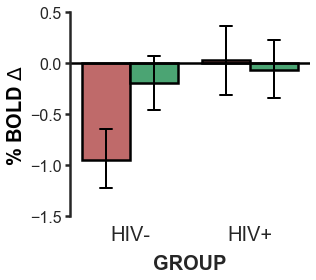

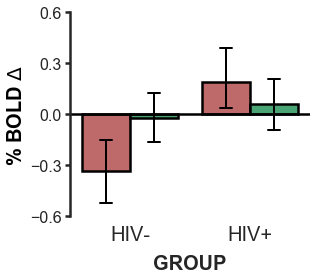

In [27]:
########### mPFC ##############nested barplot for correct and error

df2 = df_long[df_long.metric.isin(['mPFC Error', 'mPFC Correct'])]
#df2.rename(columns={'mPFC Correct': 'correct', 'mPFC Error':'error'}, inplace=True)
pal2 = sns.color_palette(['indianred', 'mediumseagreen'])
fig, ax = plt.subplots(figsize=(4.5, 4))

sns.barplot(x="HIV-status", y='value', hue="metric", data=df2, palette=pal2, errwidth=2, 
            errcolor='black', ax=ax, capsize=0.1, linewidth=2.5, edgecolor="black")
def change_width(ax, new_value) :
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .4) 

ax.set_ylabel('% BOLD 'r'$\Delta$', fontsize=20, fontweight='bold', color ='black')
ax.set_xlabel('GROUP', fontsize=20, fontweight='bold', labelpad=10)
ax.set_yticks([-1.5, -1, -0.5, 0, 0.5])
ax.set_ylim(-1.5, 0.5)
ax.tick_params(axis='both', labelsize=16, direction='out', length=5, left=True, width=2.5)
ax.tick_params(axis='x', labelsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.axhline(0, color='black', linewidth=2.5)
ax.legend().set_visible(False)
#ax.legend(fontsize=14, frameon = False, title = None, labelspacing = 0.5, 
          #loc = 'lower right')
#for tick in ax.xaxis.get_major_ticks():
    #tick.label1.set_fontweight('bold')
fig.tight_layout()
fig.savefig(fname='./figure_4/mPFC_cor-err-hiv_bar', dpi=300)



########### PCC ###############nested barplot for correct and error

df3 = df_long[df_long.metric.isin(['PCC Error', 'PCC Correct'])]
#df3.rename(columns={'PCC Correct': 'correct', 'PCC Error':'error'}, inplace=True)
pal2 = sns.color_palette(['indianred', 'mediumseagreen'])
fig, ax = plt.subplots(figsize=(4.5, 4))

sns.barplot(x="HIV-status", y='value', hue="metric", data=df3, palette=pal2, errwidth=2, 
            errcolor='black', ax=ax, capsize=0.1, linewidth=2.5, edgecolor="black")

def change_width(ax, new_value) :
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .4) 

ax.set_ylabel('% BOLD 'r'$\Delta$', fontsize=20, fontweight='bold', color ='black')
ax.set_xlabel('GROUP', fontsize=20, fontweight='bold', labelpad=10)
ax.set_yticks([-0.6, -0.3, 0.0, 0.3, 0.6])
ax.set_ylim(-0.6, 0.6)
ax.tick_params(axis='both', labelsize=16, direction='out', length=5, left=True, width=2.5)
ax.tick_params(axis='x', labelsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.axhline(0, color='black', linewidth=2.5)
ax.legend().set_visible(False)
#ax.legend(fontsize=14, frameon = False, title = None, labelspacing = 0.5, 
          #loc = 'lower right')
#for tick in ax.xaxis.get_major_ticks():
    #tick.label1.set_fontweight('bold')
fig.tight_layout()
fig.savefig(fname='./figure_4/PCC_cor-err-hiv_bar', dpi=300)


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = '../data/fig4_103.csv'
df = pd.read_csv(in_file)
df.head()

,id,HIV,CB,group,mPFC_CE,PCC_CE,mPFC_C,PCC_C,mPFC_E,PCC_E,n_aware,n_unaware,n_error,anxiety,apathy,med_score,ND-GPT-SCORE,gpt_nd_tscore,unaware_log
0,P193,1,1,1,1.73,1.21,0.30,0.13,-1.43,-1.08,37,13,53,40,12,15,7,35,1.39
1,P194,1,1,1,-0.11,0.77,0.28,-0.25,0.38,-1.02,29,3,33,34,12,16,7,38,0.96
2,P198,1,1,1,1.82,0.06,-1.44,0.33,-3.26,0.28,84,14,98,29,12,11,11,51,1.15
3,P206,2,2,4,-0.62,-0.08,-1.49,-0.29,-0.88,-0.21,90,38,136,51,12,15,11,62,1.45
4,P211,2,1,3,0.47,-1.04,-0.73,-0.87,-1.20,0.17,122,3,126,24,12,12,12,63,0.38


In [11]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

In [12]:
df.head()

,id,HIV,CB,group,mPFC_CE,PCC_CE,mPFC_C,PCC_C,mPFC_E,PCC_E,...,n_unaware,n_error,anxiety,apathy,med_score,ND-GPT-SCORE,gpt_nd_tscore,unaware_log,HIV-status,CB-status
0,P193,1,1,"HIV-, non-user",1.73,1.21,0.30,0.13,-1.43,-1.08,...,13,53,40,12,15,7,35,1.39,HIV-,non-user
1,P194,1,1,"HIV-, non-user",-0.11,0.77,0.28,-0.25,0.38,-1.02,...,3,33,34,12,16,7,38,0.96,HIV-,non-user
2,P198,1,1,"HIV-, non-user",1.82,0.06,-1.44,0.33,-3.26,0.28,...,14,98,29,12,11,11,51,1.15,HIV-,non-user
3,P206,2,2,"HIV+, user",-0.62,-0.08,-1.49,-0.29,-0.88,-0.21,...,38,136,51,12,15,11,62,1.45,HIV+,user
4,P211,2,1,"HIV+, non-user",0.47,-1.04,-0.73,-0.87,-1.20,0.17,...,3,126,24,12,12,12,63,0.38,HIV+,non-user


In [14]:
# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


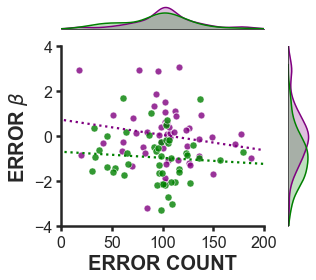

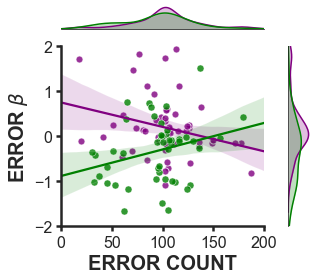

In [15]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='n_error', y='mPFC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='n_error', y='mPFC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['n_error'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['mPFC_E'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 50, 100, 150, 200])
ax_joint.set_xlim(0,200)
ax_joint.set_yticks([-4, -2, 0, 2, 4])
ax_joint.set_ylim(-4, 4)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.lines[0].set_linestyle(":")
ax_joint.lines[1].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('ERROR COUNT', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./figure_4/mPFC_error_error')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='n_error', y='PCC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='n_error', y='PCC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['n_error'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['PCC_E'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 50, 100, 150, 200])
ax_joint.set_xlim(0,200)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_yticks([-2, -1, 0, 1, 2])
ax_joint.set_ylim(-2, 2)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('ERROR COUNT', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.tight_layout()
fig.savefig(fname='./figure_4/PCC_error_error')
fig.show()

#######################################################################